# Naive Bayes (Gaussian)

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the training data
train_data = pd.read_csv("../Train_Set.csv")  # Passe den Pfad entsprechend an

# Define features and target variable for training
X_train = train_data.drop(columns=["Severity"])  # Alle Spalten außer 'Severity'
y_train = train_data["Severity"]  # Zielvariable 'Severity'

# Load the test data
test_data = pd.read_csv("../Test_Set.csv")  # Passe den Pfad entsprechend an

# Define features and target variable for testing
X_test = test_data.drop(columns=["Severity"])  # Alle Spalten außer 'Severity'
y_test = test_data["Severity"]  # Zielvariable 'Severity'

# Train the GaussianNB model
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Predict for training and testing sets
y_train_pred = gaussian_nb.predict(X_train)
y_test_pred = gaussian_nb.predict(X_test)

# Evaluate the model
print("\nGaussianNB Evaluation:")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Detailed Classification Report (per class)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))



GaussianNB Evaluation:
Testing Accuracy: 0.08944171652343184

Confusion Matrix (Test Set):
 [[  7790    642    712    218]
 [553889  51809  90075 177795]
 [133014   2721  26657  25772]
 [  9430   1829   3981  11979]]

Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.01      0.83      0.02      9362
           2       0.91      0.06      0.11    873568
           3       0.22      0.14      0.17    188164
           4       0.06      0.44      0.10     27219

    accuracy                           0.09   1098313
   macro avg       0.30      0.37      0.10   1098313
weighted avg       0.76      0.09      0.12   1098313


Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.01      0.83      0.02      9362
           2       0.91      0.06      0.11    873568
           3       0.22      0.14      0.17    188164
           4       0.06      0.44      0.10     27219

   

# Analysis for normal distribution (Shapiro-Wilk)

In [21]:
from scipy.stats import shapiro

i = 0
# Check each column of X_train
for column in X_train.columns:
    stat, p_value = shapiro(X_train[column])
    print(f"Column: {column}, Shapiro-Wilk p-value: {p_value:.4f}")
    
    # A p-value > 0.05 means that the normal distribution cannot be rejected
    if p_value > 0.05:
        print(f"--> '{column}' could be normally distributed")
    else:
        i += 1

if i == len(X_train.columns):
    print("\nNo columns normally distributed")

/Users/justus/Documents/GitHub/DataMining/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3512392.
  res = hypotest_fun_out(*samples, **kwds)


Column: Distance(mi), Shapiro-Wilk p-value: 0.0000
Column: Temperature(F), Shapiro-Wilk p-value: 0.0000
Column: Humidity(%), Shapiro-Wilk p-value: 0.0000
Column: Pressure(in), Shapiro-Wilk p-value: 0.0000
Column: Visibility(mi), Shapiro-Wilk p-value: 0.0000
Column: Wind_Direction, Shapiro-Wilk p-value: 0.0000
Column: Wind_Speed(mph), Shapiro-Wilk p-value: 0.0000
Column: Weather_Condition, Shapiro-Wilk p-value: 0.0000
Column: Amenity, Shapiro-Wilk p-value: 0.0000
Column: Crossing, Shapiro-Wilk p-value: 0.0000
Column: Give_Way, Shapiro-Wilk p-value: 0.0000
Column: Junction, Shapiro-Wilk p-value: 0.0000
Column: No_Exit, Shapiro-Wilk p-value: 0.0000
Column: Railway, Shapiro-Wilk p-value: 0.0000
Column: Stop, Shapiro-Wilk p-value: 0.0000
Column: Traffic_Calming, Shapiro-Wilk p-value: 0.0000
Column: Traffic_Signal, Shapiro-Wilk p-value: 0.0000
Column: Civil_Twilight, Shapiro-Wilk p-value: 0.0000
Column: Duration_Seconds, Shapiro-Wilk p-value: 0.0000
Column: Cluster, Shapiro-Wilk p-value: 0.0

# Graphical analysis for normal distribution

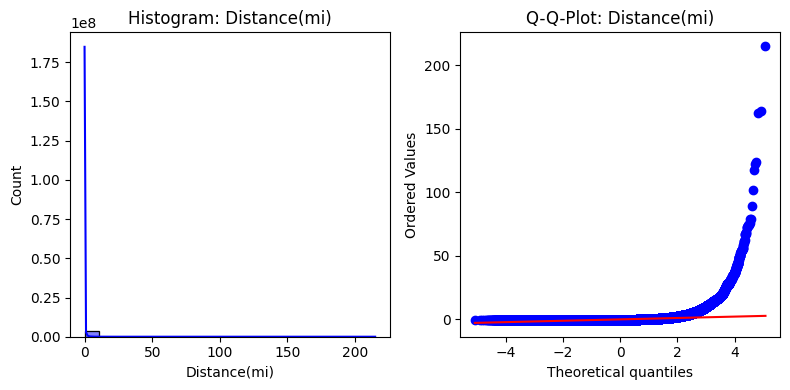

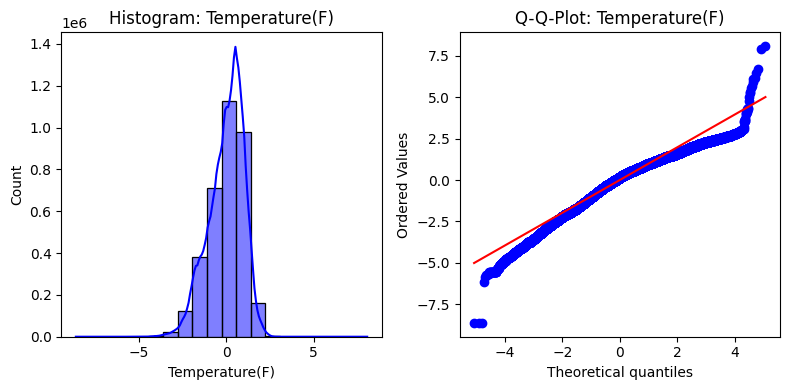

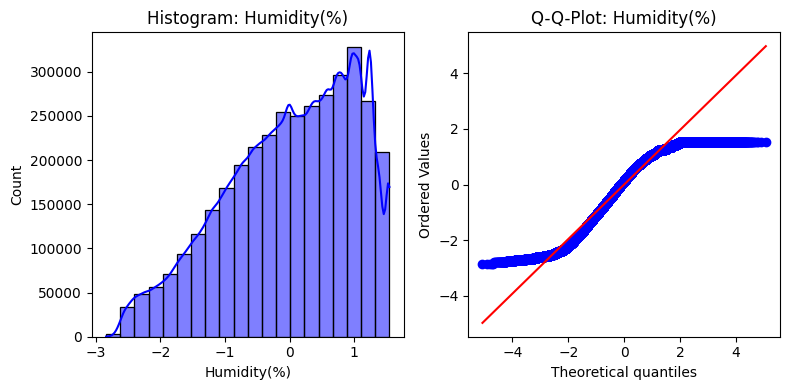

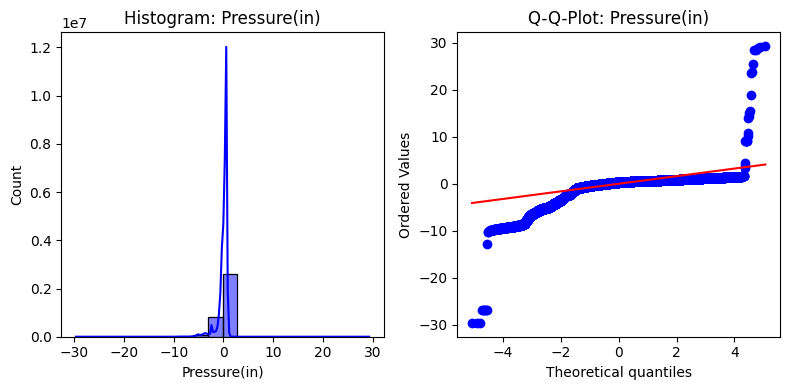

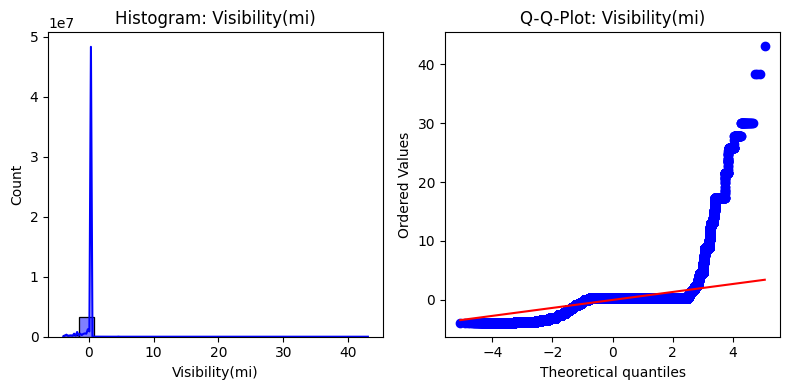

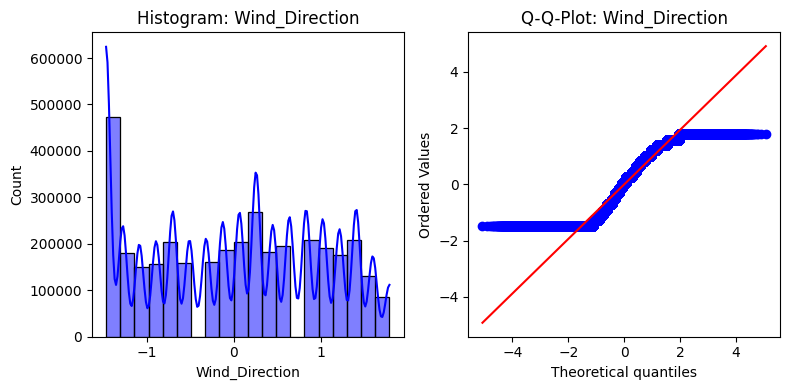

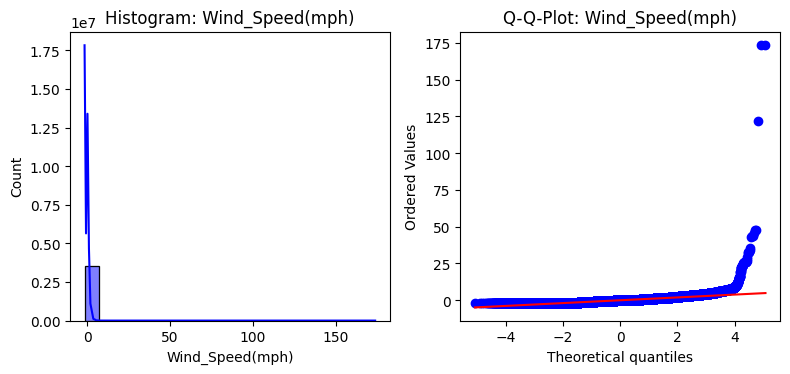

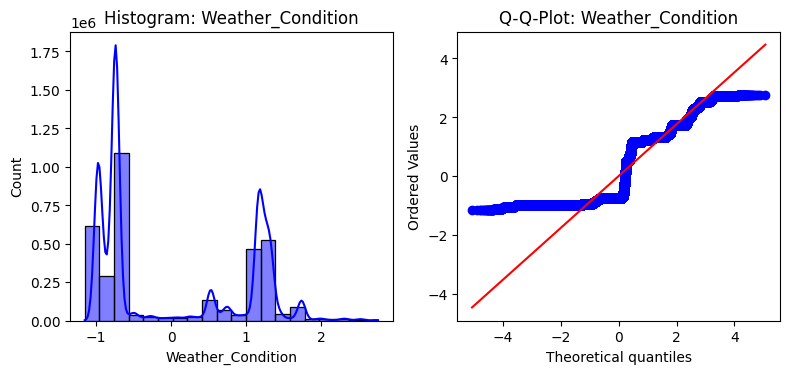

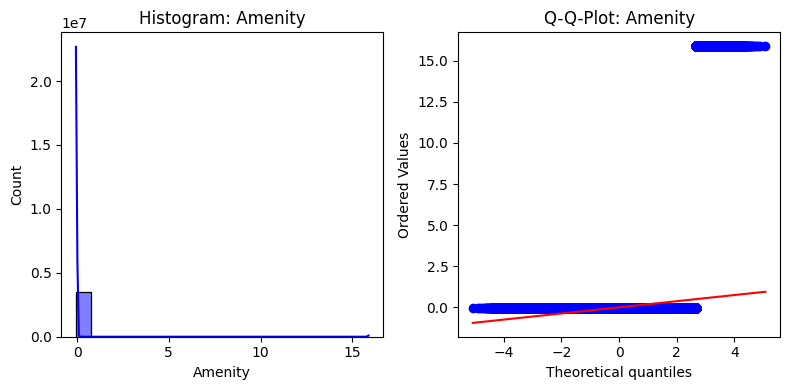

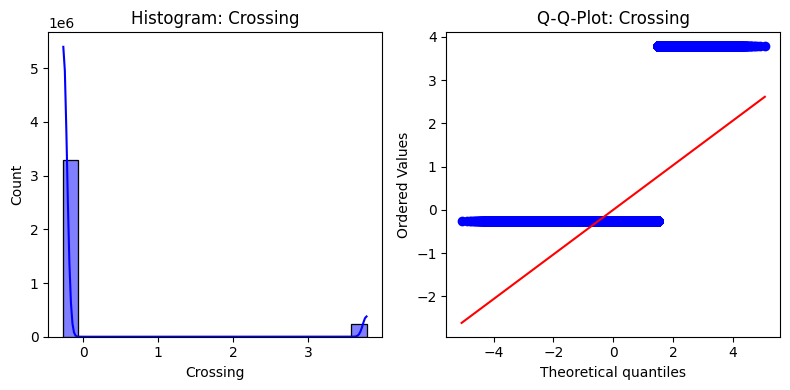

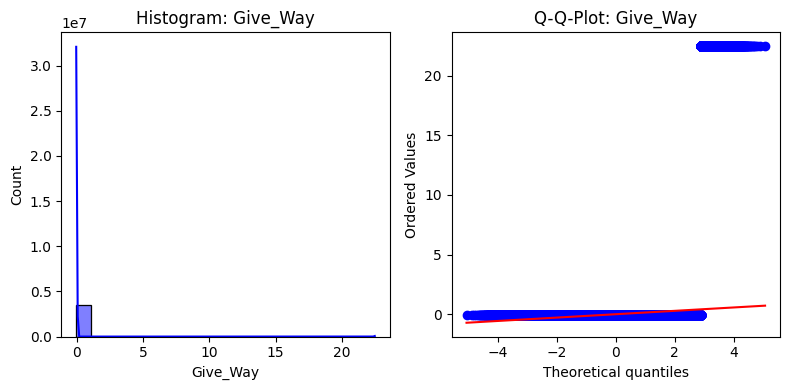

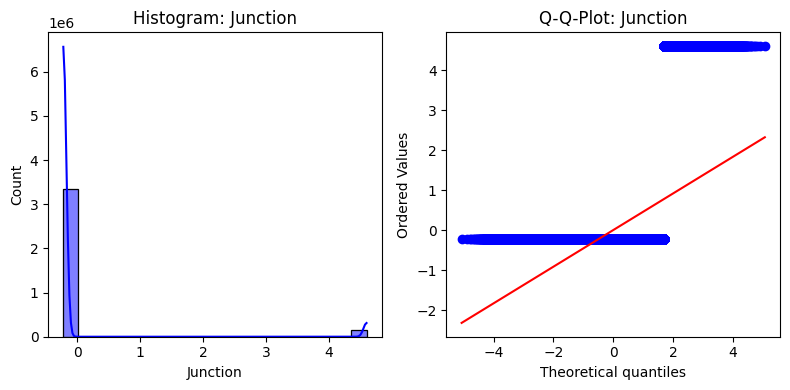

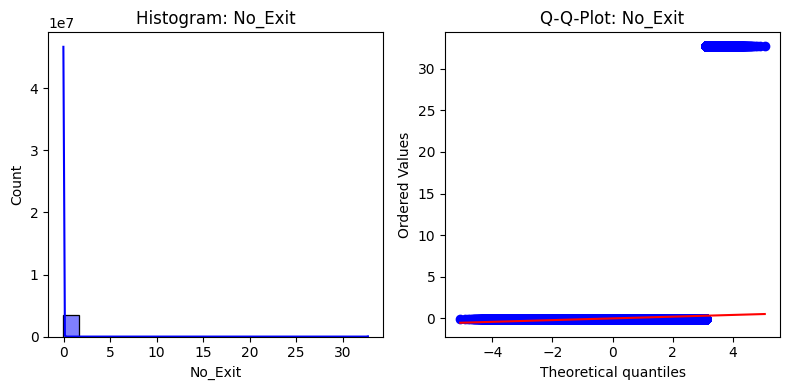

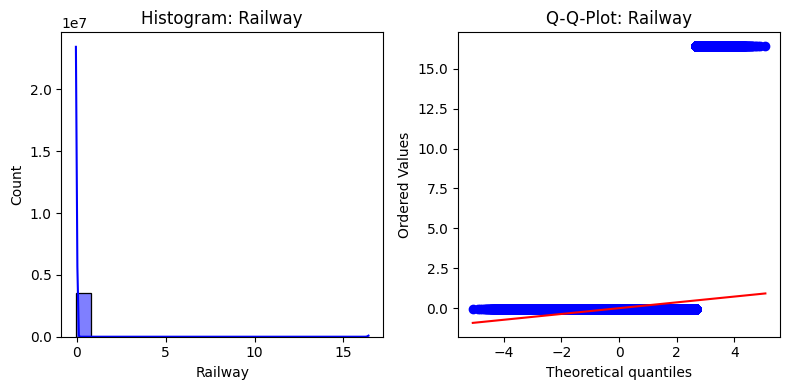

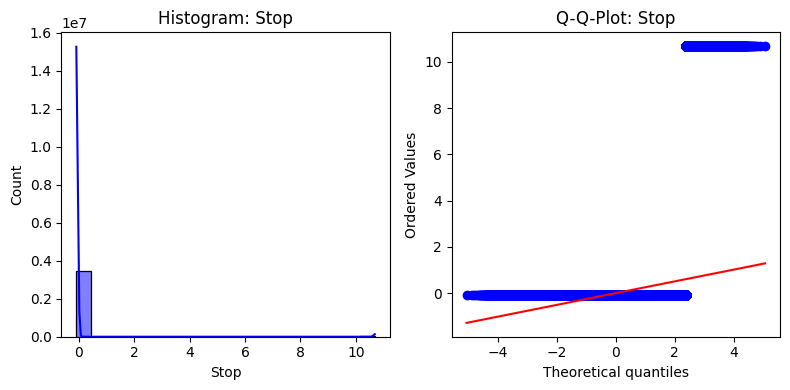

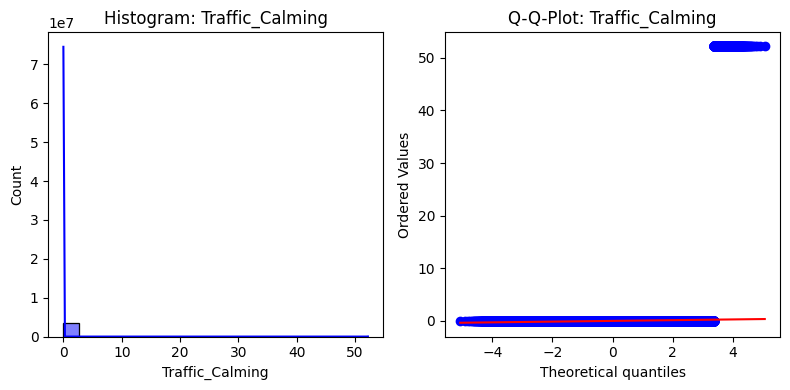

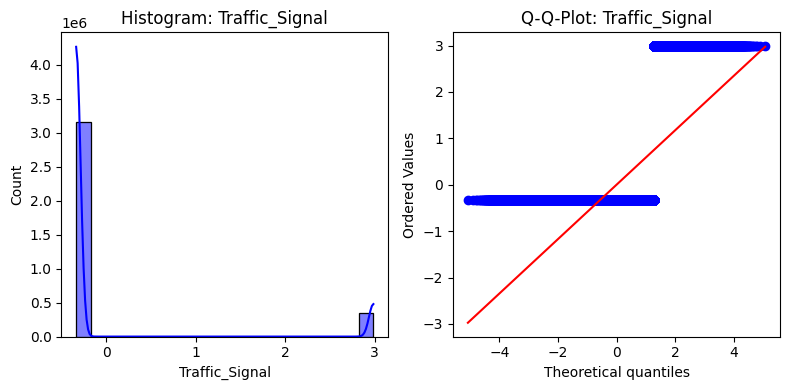

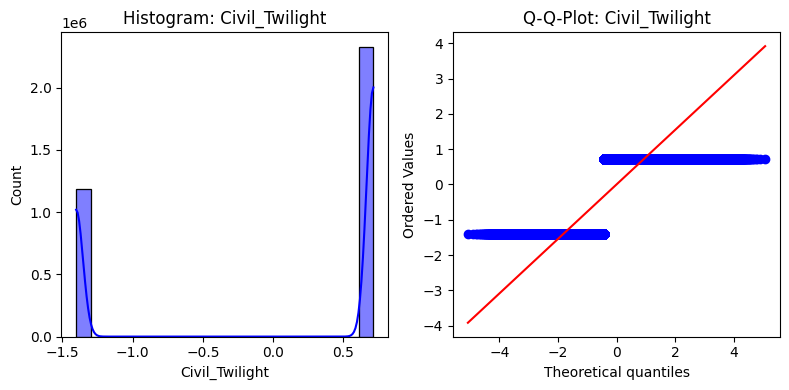

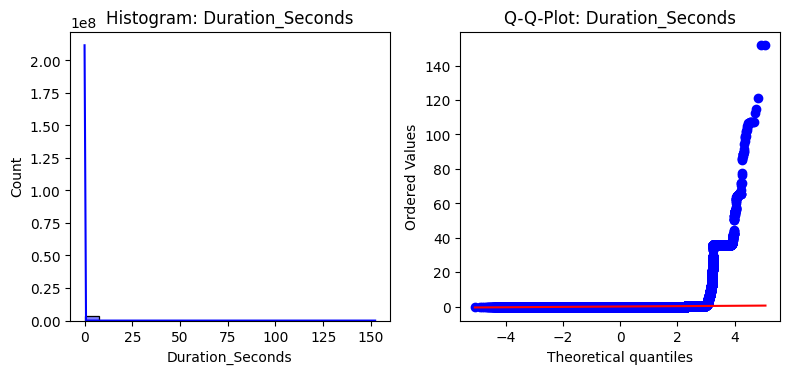

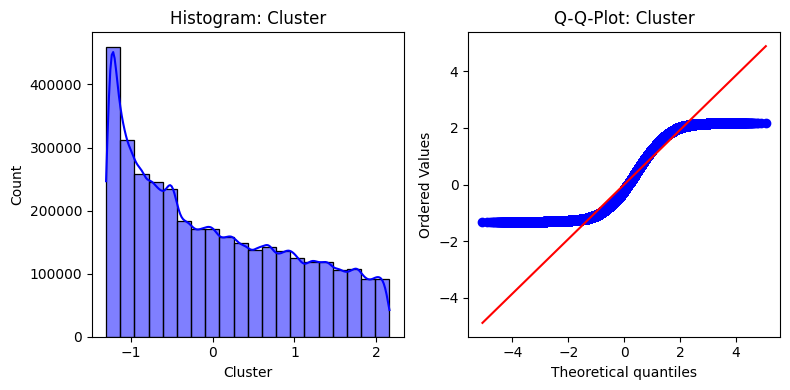

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Histogramme für alle Spalten
for column in X_train.columns:
    plt.figure(figsize=(8, 4))
    
    # Histogramm
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], kde=True, bins=20, color='blue')
    plt.title(f"Histogram: {column}")
    
    # Q-Q-Plot
    # If the points in the Q-Q plot lie along a diagonal line, the data set corresponds well with the normal distribution.
    plt.subplot(1, 2, 2)
    probplot(X_train[column], dist="norm", plot=plt)
    plt.title(f"Q-Q-Plot: {column}")
    
    plt.tight_layout()
    plt.show()